<div dir=rtl align=center>

<img src='https://upload.wikimedia.org/wikipedia/fa/thumb/a/a9/Sharif_logo.svg/626px-Sharif_logo.svg.png?20110526112825' alt="SUT logo" width=200 height=200 align=center  >
<br>
<font face="B Yekan">
<font color=0F5298 size=7>
یادگیری ماشین<br>
<font color=2565AE size=5>
دانشکده مهندسی صنایع<br>
<font color=2565AE size=4>
دکتر مهدی شریف زاده <br>
<font  size=4>
امیرحسین محمودی <br>
بهار 1402<br>

<font color=3C99D size=5>
تمرین عملی 0<br>
    
    
    
____


# Libararies
you can import your needed libararies below.

In [30]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Documentation


We will use "Breast Cancer Gene Expression Profiles (METABRIC)" data located in current folder.
The first 31 columns of data contain clinical information including death status.
The next columns of the data contain gene's related information which includes both gene expressions and mutation information. (gene's mutation info columns have been marked with "\_mut" at the end of the names of the columns)
For more information please read the [data documentation](https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric).


# Data Loading(5 Points)
Load dataset from csv file located in current folder:


In [4]:
df = pd.read_csv("/Users/wdinasaur/Downloads/ML-Sharif/ML_HW0/METABRIC_RNA_Mutation.csv")
df.head()

/var/folders/cl/tkj6c1cd69q_9x9j76lm6sf00000gn/T/ipykernel_7626/2690185096.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/dinasaur/Downloads/ML-Sharif/ML_HW0/METABRIC_RNA_Mutation.csv")


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


# Data Preparation (25 Points)


In this section you must split data into three datasets:
<br>
1- clinical dataset
<br>
2- gene expressions dataset
<br>
3- gene mutation dataset.
<br>
All datasets should have the patient_id and overall_survival column.
<br>
You may get warning about data type of some columns.fix the warning.

In [5]:
clinical_data=df.loc[:,"patient_id":"death_from_cancer"]
clinical_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [13]:
id_survival=df.loc[:,["patient_id","overall_survival"]]
df2=df.loc[:,"brca1":"ugt2b7"]
gen_exp_data=id_survival.join(df2)
gen_exp_data.head()

,patient_id,overall_survival,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,0,1,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,2,1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,5,0,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,6,1,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,8,0,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223


In [15]:
df3=df.loc[:,"pik3ca_mut":"siah1_mut"]
gen_mut_data=id_survival.join(df)
gen_mut_data.head()

,patient_id,overall_survival,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,H178P,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,H1047R,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,1,E542K,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,S241F,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory data analysis (EDA) (70 Points)

## Clinical data EDA


### missing values (10 Points)
plot the percentage of missing values in clinical data:

Text(0.5, 1.0, 'Quantifying missing data')

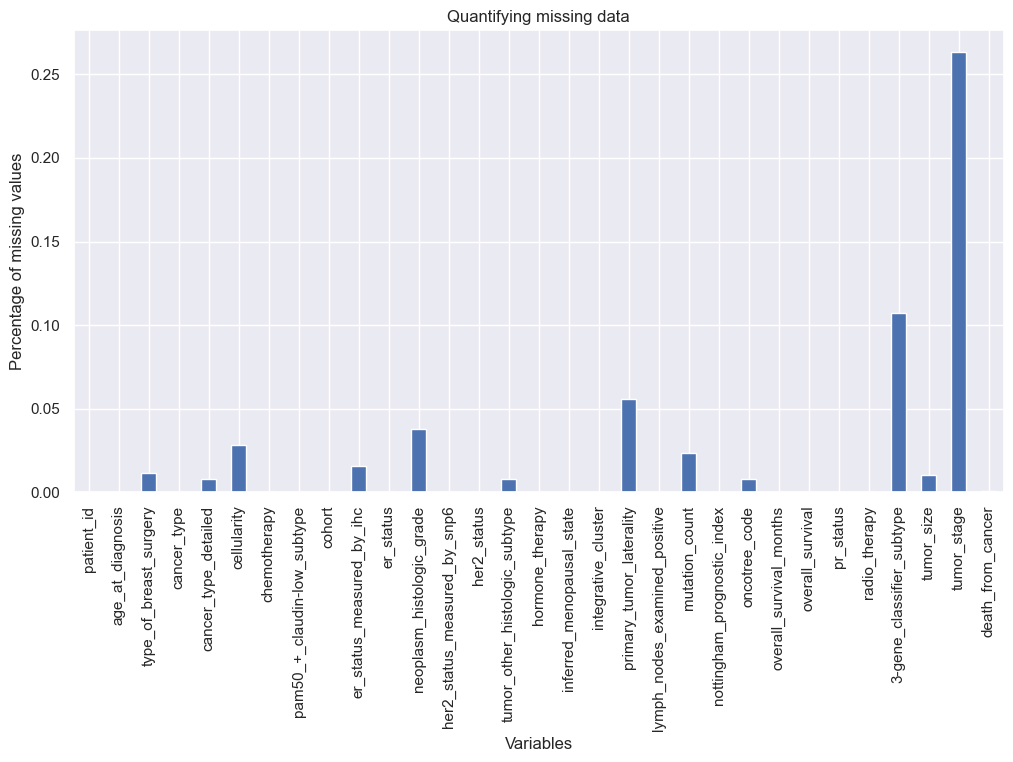

In [49]:
clinical_data.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

sample result:

### Box plot of numerical columns (20 Points)
Seperate numerical columns of the clincical data and plot their box plot.(hint: you can use sns.boxplot )


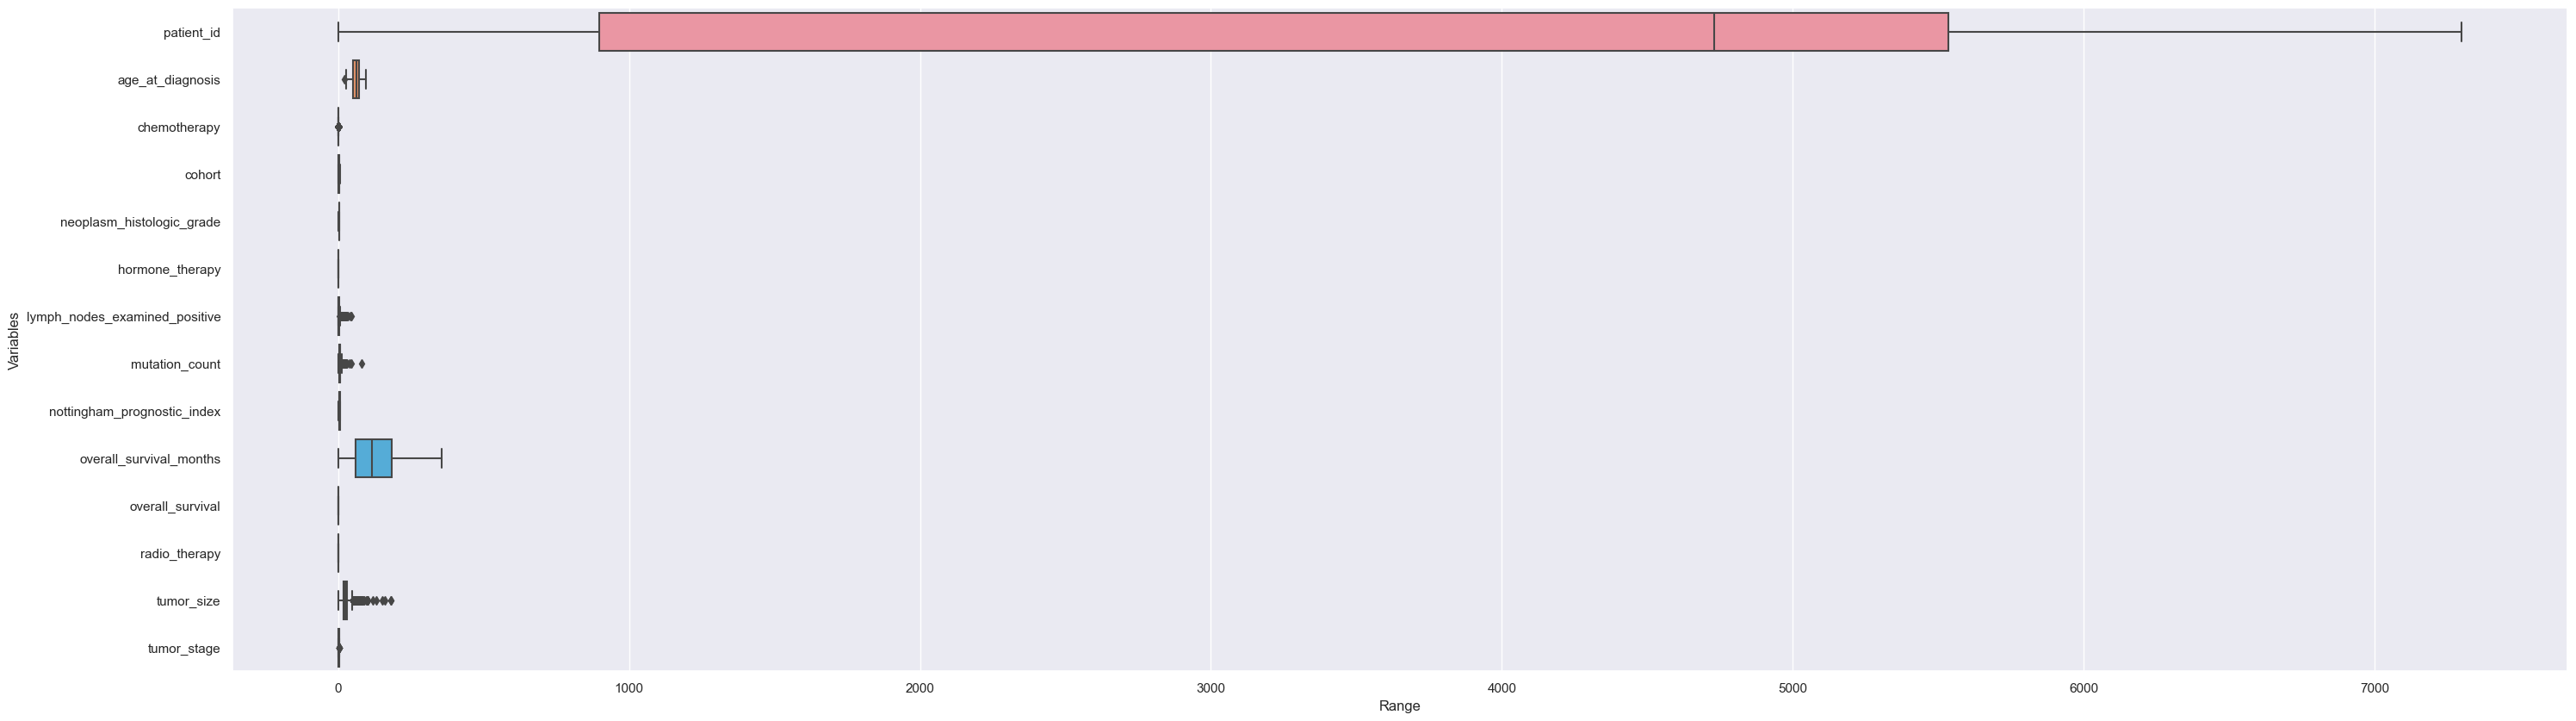

In [78]:
def numerical_df(df):
    num_df=df.select_dtypes(include=np.number)
    return num_df
numerical=numerical_df(clinical_data)
sns.set(rc={'figure.figsize':(35,10)})
box_plot=sns.boxplot(orient="h",data=numerical).set(xlabel='Range',ylabel='Variables')

### Target classes plots (20 Points)
Plot the histogram of age_at_diagnosis , overall_survival_months  and tumor_size based for people who died and survived(based on overall_survival column).
<br>
(hint: use sns.histplot. you cal use plt.subplot for having 3 plots in one figure) 

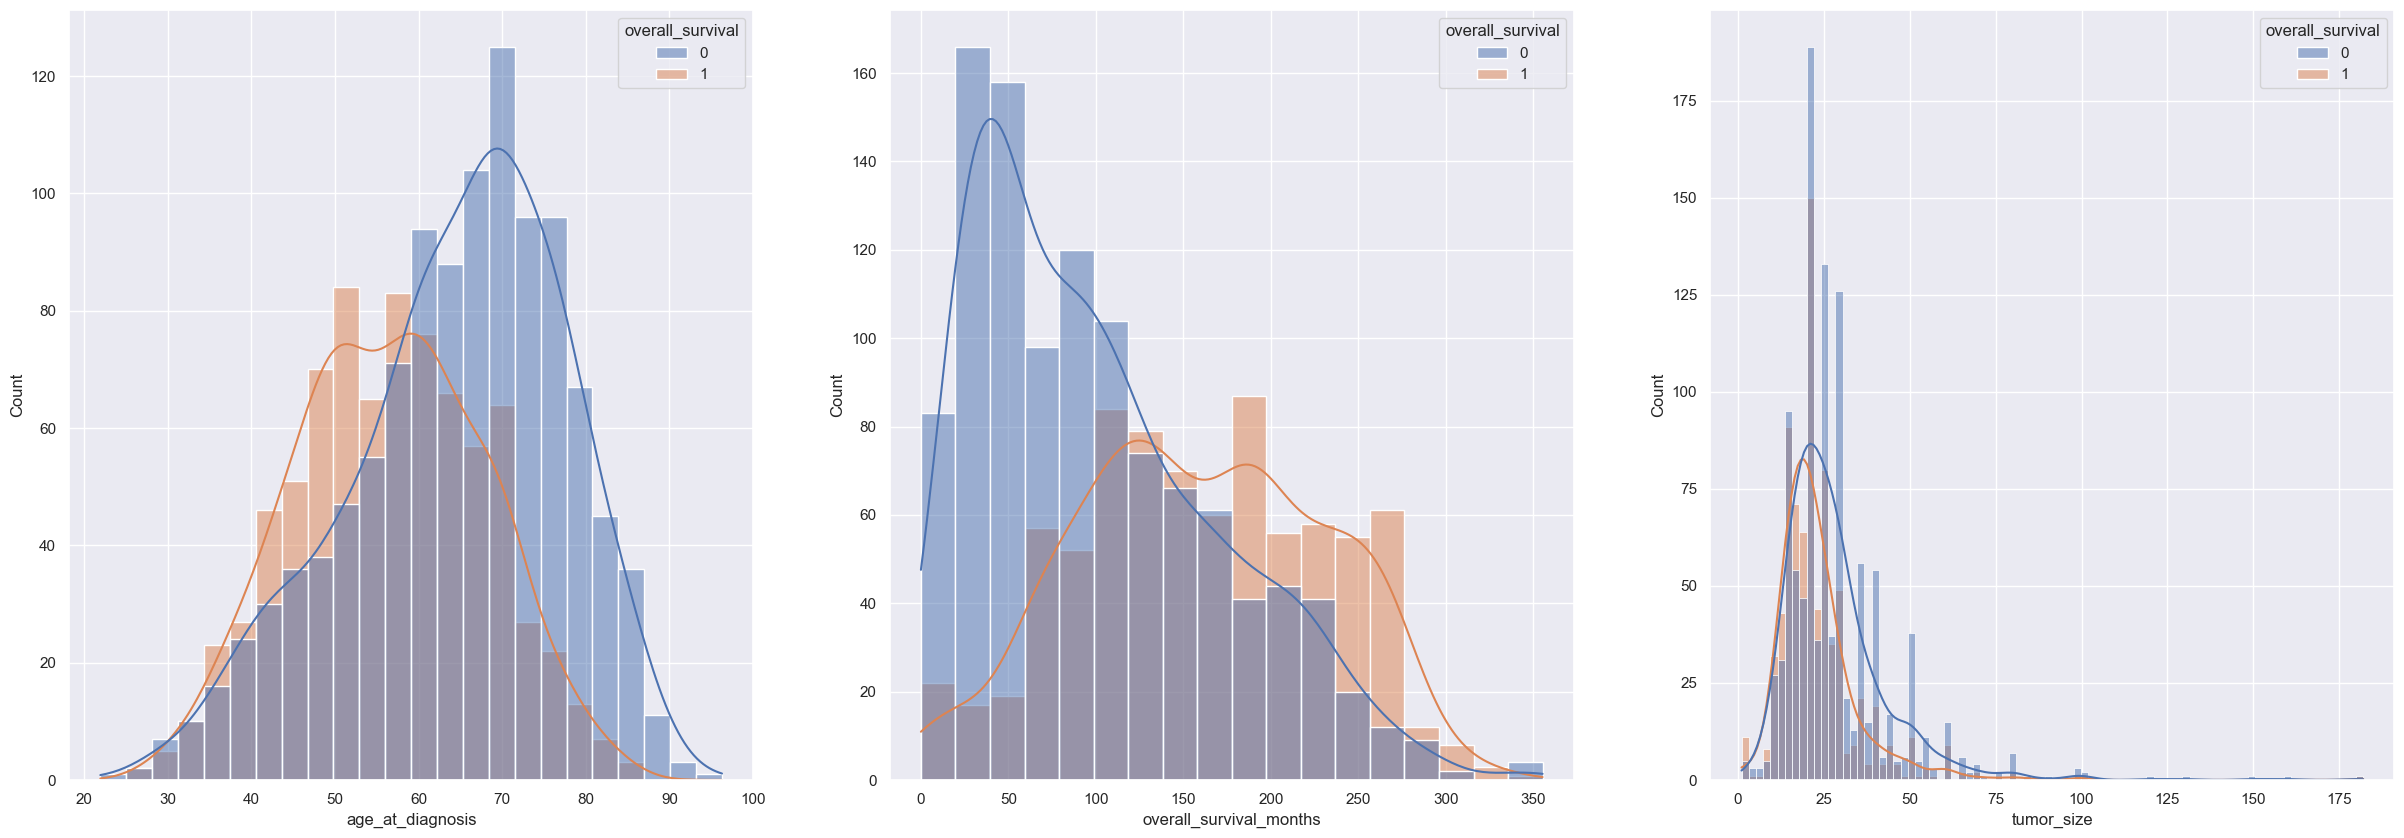

In [70]:
fig,axs = plt.subplots(1, 3, figsize=(30, 10))
sns.histplot(data=clinical_data, x="age_at_diagnosis", hue="overall_survival",kde=True,ax=axs[0])
sns.histplot(data=clinical_data, x="overall_survival_months", hue="overall_survival",kde=True,ax=axs[1])
sns.histplot(data=clinical_data, x="tumor_size", hue="overall_survival",kde=True,ax=axs[2])
plt.show()

### Making dummy dataframe (20 Points)
To analyse data in the future we need to convert categorical values to dummy variables.To do this first find the list of categorical variables.and then use pd.get_dummies. finally print the columns list of new dataset.

In [77]:
categorical=df.select_dtypes(include=['object']).columns.tolist()
dummies=pd.get_dummies(categorical)
df.drop(categorical,axis = 1).join(dummies)

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,tp53_mut,ttyh1_mut,tumor_other_histologic_subtype,type_of_breast_surgery,ubr5_mut,ush2a_mut,usp28_mut,usp9x_mut,utrn_mut,zfp36l1_mut
0,0,75.65,0,1.0,3.0,1,10.0,NaN,6.044,140.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,43.19,0,1.0,3.0,1,0.0,2.0,4.020,84.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,48.87,1,1.0,2.0,1,1.0,2.0,4.030,163.700000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,47.68,1,1.0,2.0,1,3.0,1.0,4.050,164.933333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,76.97,1,1.0,3.0,1,8.0,2.0,6.080,41.366667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,0,4.0,3.0,1,1.0,4.0,5.050,196.866667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900,7296,42.88,0,4.0,3.0,0,1.0,6.0,5.040,44.733333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901,7297,62.90,0,4.0,3.0,1,45.0,4.0,6.050,175.966667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,7298,61.16,0,4.0,2.0,1,12.0,15.0,5.050,86.233333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
